In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
% load_ext rpy2.ipython

In [3]:
%%R
library(arm)

/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: MASS

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Matrix

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lme4

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
arm (Version 1.8-6, built: 2015-7-7)


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Working directory is /home/byang/Cold_Start


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [4]:
%%R
library(ggplot2)

In [5]:
%%R
library(caret)

/home/byang/anaconda2/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [6]:
%%R
base <- read.table("df1.csv", sep =",",header=TRUE)
#load("RData")

In [7]:
%%R
load("Label2.RData")

In [8]:
%%R
#Lift curve is the plot between total lift and %population
# True label: label
# Predicted label: Predict
# largest P according to the sort order of the submission

#######The lift chart shows how much more likely we are to receive positive responses than 
#######if we contact a random sample of customers. For example, by contacting only 10% of 
#######customers based on the predictive model we will reach 3 times as many respondents, 
#######as if we use no model.

takeTopP  <- function(df, p) {
  df  <- df[order(df$predict, decreasing = T),]
  numToTake = ceiling(p*nrow(df))
  return(df[1:numToTake,])
}

liftvalue <- function(df,p){
  top <- takeTopP(df,p)
  lift_value <- sum(top$label) /(p*sum(df$label))
  return(lift_value)
}

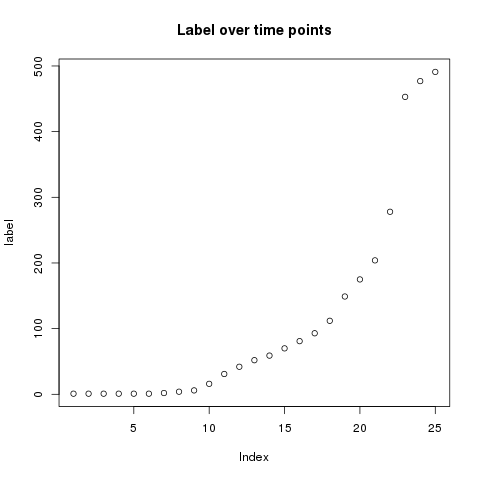

In [9]:
%%R
label <- rep(0,25)
for (i in 1:25){
  label[i] <- table(label_list[[i]])[2]
}
plot(label,main="Label over time points")

In [10]:
%%R
label

 [1]   1   1   1   1   1   1   2   4   6  16  31  42  52  59  70  81  93 112 149
[20] 175 204 278 453 477 491


In [11]:
%%R
#extract numeric features
features <- base[c("NUM_USERS","NUM_ACCOUNTS","NUM_CONTACTS","NUM_OPPTS","NUM_FORECASTS","NUM_REPORTS","NUM_LEADS",
                       "NUM_CASES","NUM_SOLUTIONS","NUM_CASE_QUEUES","NUM_CAMPAIGNS","NUM_CUSTOM_APPS","NUM_CUSTOM_TABS", 
                       "NUM_CUSTOM_OBJECTS","NUM_CUSTOM_OBJECT_RECORDS","NUM_DOCUMENTS","NUM_CONTRACTS",
                       "NUM_CASE_RECORD_TYPES","NUM_ESCALATION_RULES","NUM_DASHBOARDS","NUM_EMAIL_TEMPLATES","NUM_VF_PG_TOT")]

In [12]:
%%R
log_trans <- function(var){
    logvar <- log(var+1)
    return(logvar)
}
features <- apply(features, 2, log_trans)

In [13]:
%%R
#first scaling all nonbinary variables to have mean 0 and standard deviation 0.5
bayesscale<- function(myVar){
  zVar <-0.5* (myVar - mean(myVar)) / sd(myVar)
  return(zVar)
}
#base
base_s <- apply(features,2,bayesscale)
base_s <- data.frame(base_s)

In [14]:
%%R
names(base_s)

 [1] "NUM_USERS"                 "NUM_ACCOUNTS"             
 [3] "NUM_CONTACTS"              "NUM_OPPTS"                
 [5] "NUM_FORECASTS"             "NUM_REPORTS"              
 [7] "NUM_LEADS"                 "NUM_CASES"                
 [9] "NUM_SOLUTIONS"             "NUM_CASE_QUEUES"          
[11] "NUM_CAMPAIGNS"             "NUM_CUSTOM_APPS"          
[13] "NUM_CUSTOM_TABS"           "NUM_CUSTOM_OBJECTS"       
[15] "NUM_CUSTOM_OBJECT_RECORDS" "NUM_DOCUMENTS"            
[17] "NUM_CONTRACTS"             "NUM_CASE_RECORD_TYPES"    
[19] "NUM_ESCALATION_RULES"      "NUM_DASHBOARDS"           
[21] "NUM_EMAIL_TEMPLATES"       "NUM_VF_PG_TOT"            


In [15]:
%%R
dim(base_s)

[1] 271818     22


In [16]:
%%R
######################################################
##############################split the dataset#######
######################################################
# Leave out labels in 2016 as testing set to get lift score
# Label2[21]: "2016-01-01" 204;    Label2[24]: "2016-03-31" 477
# 273 labels in 2016
testlabel <- rep(0,dim(base)[1])
last <- unlist(label_list[25])
first <- unlist(label_list[21])
#testlabel[last==1 & first==0]=1
#table(testlabel)

#testlabel[first==0]




#testingpostive <- cbind(base_s,testlabel)
#testingpostive <- testingpostive[testingpostive$testlabel==1,]# 288*29

#negative <- cbind(base_s,last)
#negative <- negative[negative$last==0,]

#names(negative)[names(negative)=="last"] <- "testlabel"

#testing <- rbind(testingpostive, negative)

# For negative users, 80% for training, 20% for testing
#inTrain <- createDataPartition(y=negative$NUM_ACCOUNTS,p=0.8,list=F)
#negativetraining <- negative[inTrain,]   #223970*29
#negativetesting <- negative[-inTrain,]   #55990*29

In [17]:
%%R
remove <- which(first==1)

In [18]:
%%R
testlabel <- last[-remove]
testing <- base_s[-remove,]
dim(testing)
testing <- cbind(testing, testlabel)

In [19]:
%%R
dim(testing)
sum(testlabel)

[1] 287


In [20]:
%%R
names(testing)
#names(negative)

 [1] "NUM_USERS"                 "NUM_ACCOUNTS"             
 [3] "NUM_CONTACTS"              "NUM_OPPTS"                
 [5] "NUM_FORECASTS"             "NUM_REPORTS"              
 [7] "NUM_LEADS"                 "NUM_CASES"                
 [9] "NUM_SOLUTIONS"             "NUM_CASE_QUEUES"          
[11] "NUM_CAMPAIGNS"             "NUM_CUSTOM_APPS"          
[13] "NUM_CUSTOM_TABS"           "NUM_CUSTOM_OBJECTS"       
[15] "NUM_CUSTOM_OBJECT_RECORDS" "NUM_DOCUMENTS"            
[17] "NUM_CONTRACTS"             "NUM_CASE_RECORD_TYPES"    
[19] "NUM_ESCALATION_RULES"      "NUM_DASHBOARDS"           
[21] "NUM_EMAIL_TEMPLATES"       "NUM_VF_PG_TOT"            
[23] "testlabel"                


In [21]:
%%R
base2 <- testing
base2$label <- testing$testlabel

In [22]:
%%R
base2$label <- as.factor(base2$label)

In [24]:
%%R
# Why Bayes?
#Prior information can allow for reasonable inference with moderate samples
#Allows for a wider class of applicable inference than frequency interpretation of probability
#Intuitive interpretation
# bayesglm with gaussian family (bayes lm)
############before split the data for testing#########
######################################################
####this should be identical to classical logit#######
######################################################

NULL


In [25]:
%%R
#############after split the data for testing#########
######################################################
####this should be identical to classical logit#######
######################################################
label_0 <- rep(0,dim(base)[1] )
model2 <- bayesglm(formula = label_0 ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.scale=Inf, prior.df=Inf)
display(model2)
predicted1 <- predict(model2, testing, type="response")
base2 <- testing
base2$label <- testing$testlabel
base2$predict <- predicted1
liftvalue(base2,0.1) 

bayesglm(formula = label_0 ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + 
    NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS + 
    NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + 
    NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + NUM_DOCUMENTS + 
    NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.scale = Inf, prior.df = Inf, maxit = 100)
                          coef.est coef.se
(Intercept)               -14.93     3.23 
NUM_ACCOUNTS                0.00    14.62 
NUM_CONTACTS                0.00    14.48 
NUM_OPPTS                   0.00    10.55 
NUM_FORECASTS               0.00     7.06 
NUM_REPORTS                 0.00    16.54 
NUM_LEADS                   0.00     9.45 
NUM_CASES                   0.00    11.23 
NUM_SOLUTIONS               0.00    11.74 
NUM_CASE_QUEUES             0.00     7.43 
NUM_CAMPAIGNS       

In [28]:
%%R
liftscore <- rep(0,20)
#model1 <- vector("list", 20)
predicted <- vector("list", 20)
#base2 <- vector("list", 20)
for (i in 1:20){
    model2 <- bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.scale=Inf, prior.df=Inf)
    display(model2)
    predicted1 <- predict(model2, testing, type="response")
    base2 <- testing
    base2$label <- testing$testlabel
    base2$predict <- predicted1
    print(liftvalue(base2,0.1)) 
    liftscore[i] <- liftvalue(base2,0.1)
}

bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + 
    NUM_OPPTS + NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + 
    NUM_SOLUTIONS + NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + 
    NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + 
    NUM_DOCUMENTS + NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.scale = Inf, prior.df = Inf, maxit = 100)
                          coef.est coef.se
(Intercept)               -31.51    12.08 
NUM_ACCOUNTS               -8.93    14.75 
NUM_CONTACTS                2.45    12.56 
NUM_OPPTS                  -5.44    12.56 
NUM_FORECASTS              -3.02    14.37 
NUM_REPORTS                -4.42    23.81 
NUM_LEADS                   3.86     9.33 
NUM_CASES                   1.41     6.20 
NUM_SOLUTIONS               0.12     4.43 
NUM_CASE_QUEUES            -3.89    12.01 
NUM_CAMPAIGN

In [29]:
%%R
liftscore
# The lift score at time point 7 is 10, while there are only 3 labels in total. 
# The papameters are inflated with scale e+12.
# The problems of collinearity is that small changes in the data make big changes in the results.

 [1] 1.533101 1.533101 1.533101 1.533101 1.533101 1.533101 1.637631 5.888502
 [9] 6.306620 6.480836 6.794425 7.317073 7.421603 7.212544 7.386760 7.526132
[17] 7.560976 7.735192 7.560976 7.595819


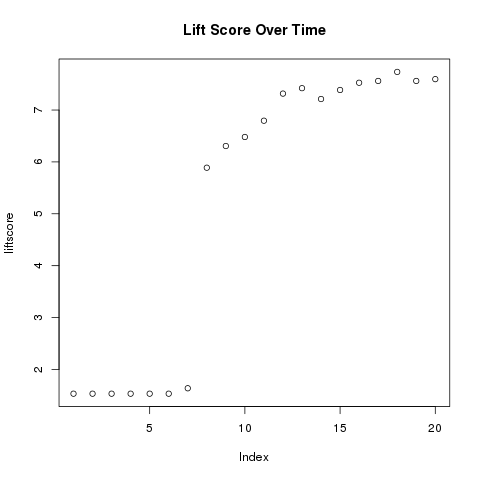

In [30]:
%%R
plot(liftscore,main='Lift Score Over Time')
# At time point 7, when the number of labels increases from 2 to 3, the lift score jumps to 10.

In [31]:
%%R
###Comparision of model performance at time point 19 when we set different priors.
###When apply Gaussian priors with mean 0 and 1, the model parameter and lift score remain the same, 6.145833.
###When apply t priors with df 1 (Cauchy) and 7, the model parameter and lift score remain the same, 6.180556.
model1 <- bayesglm(formula = label_list[[19]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   prior.scale=Inf, prior.df=Inf)


display(model1)
predicted1 <- predict(model1, testing, type="response")
base2 <- testing
base2$label <- testing$testlabel
base2$predict <- predicted1
liftvalue(base2,0.1) 

bayesglm(formula = label_list[[19]] ~ NUM_ACCOUNTS + NUM_CONTACTS + 
    NUM_OPPTS + NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + 
    NUM_SOLUTIONS + NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + 
    NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + 
    NUM_DOCUMENTS + NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.scale = Inf, prior.df = Inf)
                          coef.est coef.se
(Intercept)               -9.62     0.23  
NUM_ACCOUNTS              -0.44     0.30  
NUM_CONTACTS               0.77     0.36  
NUM_OPPTS                  0.14     0.19  
NUM_FORECASTS             -0.08     0.06  
NUM_REPORTS                1.03     0.57  
NUM_LEADS                  0.13     0.20  
NUM_CASES                  0.16     0.14  
NUM_SOLUTIONS             -0.13     0.11  
NUM_CASE_QUEUES            0.22     0.06  
NUM_CAMPAIGNS           

In [32]:
%%R
liftscore_cauchy <- rep(0,20)
#model1 <- vector("list", 20)
predicted_cauchy <- vector("list", 20)
#base2 <- vector("list", 20)
for (i in 1:20){
    model <- bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.scale=2.5, prior.df=1)
    display(model)
    predicted1 <- predict(model, testing, type="response")
    base2 <- testing
    base2$label <- testing$testlabel
    base2$predict <- predicted1
    print(liftvalue(base2,0.1)) 
    liftscore_cauchy[i] <- liftvalue(base2,0.1)
}

bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + 
    NUM_OPPTS + NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + 
    NUM_SOLUTIONS + NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + 
    NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + 
    NUM_DOCUMENTS + NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.scale = 2.5, prior.df = 1, maxit = 100)
                          coef.est coef.se
(Intercept)               -16.66     3.83 
NUM_ACCOUNTS               -0.57     2.05 
NUM_CONTACTS               -0.19     2.08 
NUM_OPPTS                  -0.76     1.86 
NUM_FORECASTS              -0.84     1.26 
NUM_REPORTS                 0.33     2.21 
NUM_LEADS                   0.45     1.93 
NUM_CASES                   0.17     1.48 
NUM_SOLUTIONS               0.54     1.11 
NUM_CASE_QUEUES            -1.31     1.22 
NUM_CAMPAIGNS 

In [33]:
%%R
liftscore_cauchy

 [1] 4.285714 4.285714 4.285714 4.285714 4.285714 4.285714 4.599303 6.480836
 [9] 6.585366 6.794425 6.933798 7.317073 7.456446 7.386760 7.456446 7.560976
[17] 7.665505 7.735192 7.560976 7.595819


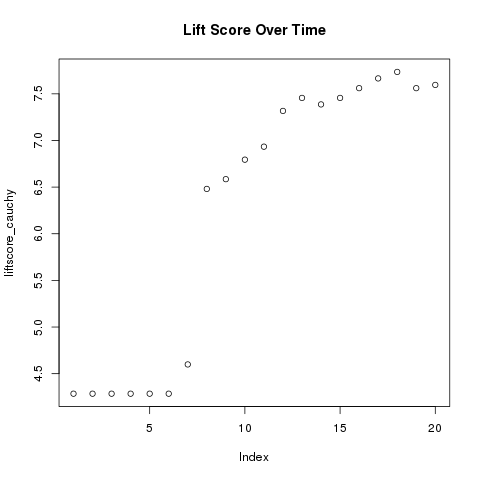

In [34]:
%%R
plot(liftscore_cauchy,main='Lift Score Over Time')

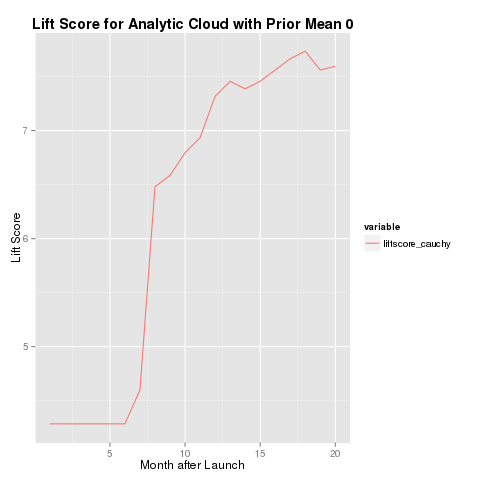

In [42]:
%%R
library(ggplot2)
library(reshape2)
# original data in a 'wide' format
x <- seq(1, 20, 1)
df <- data.frame(x,liftscore_cauchy)
# melt the data to a long format
df2 <- melt(data = df, id.vars = "x")
# plot, using the aesthetics argument 'colour'
ggplot(data = df2, aes(x = x, y = value, colour = variable)) + geom_line()+ 
ggtitle("Lift Score for Analytic Cloud with Prior Mean 0") + theme(plot.title = element_text(lineheight=.8, face="bold"))+ 
xlab("Month after Launch") +ylab("Lift Score") 

In [38]:
%%R
liftscore_cauchy_mean <- rep(0,20)
#model1 <- vector("list", 20)
predicted_cauchy <- vector("list", 20)
#base2 <- vector("list", 20)
for (i in 1:20){
    model <- bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.mean=1,prior.scale=2.5, prior.df=1)
    display(model)
    predicted1 <- predict(model, testing, type="response")
    base2 <- testing
    base2$label <- testing$testlabel
    base2$predict <- predicted1
    print(liftvalue(base2,0.1)) 
    liftscore_cauchy_mean[i] <- liftvalue(base2,0.1)
}

bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + 
    NUM_OPPTS + NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + 
    NUM_SOLUTIONS + NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + 
    NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + 
    NUM_DOCUMENTS + NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.mean = 1, prior.scale = 2.5, prior.df = 1, 
    maxit = 100)
                          coef.est coef.se
(Intercept)               -19.98     5.78 
NUM_ACCOUNTS               -0.45     2.28 
NUM_CONTACTS                0.08     2.27 
NUM_OPPTS                  -0.78     2.03 
NUM_FORECASTS              -0.71     1.04 
NUM_REPORTS                 0.62     2.25 
NUM_LEADS                   0.83     2.05 
NUM_CASES                   0.16     1.65 
NUM_SOLUTIONS               0.65     1.16 
NUM_CASE_QUEUES            -1.50    

In [39]:
%%R
liftscore_cauchy_mean

 [1] 4.878049 4.878049 4.878049 4.878049 4.878049 4.878049 5.052265 6.411150
 [9] 6.655052 6.620209 6.898955 7.282230 7.456446 7.317073 7.421603 7.560976
[17] 7.630662 7.735192 7.560976 7.595819


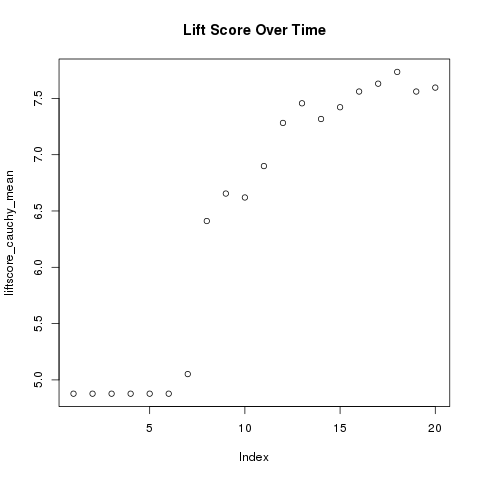

In [40]:
%%R
plot(liftscore_cauchy_mean,main='Lift Score Over Time')

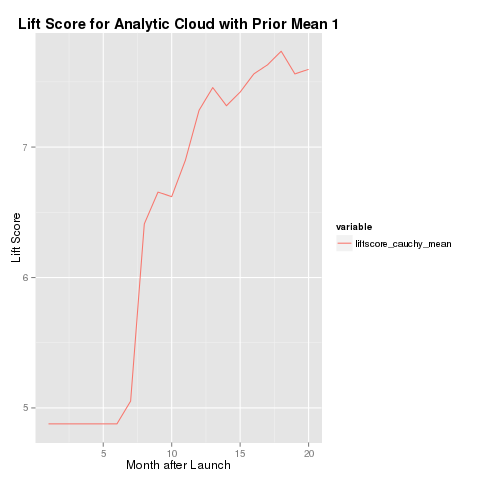

In [43]:
%%R
library(ggplot2)
library(reshape2)
# original data in a 'wide' format
x <- seq(1, 20, 1)
df <- data.frame(x,liftscore_cauchy_mean)
# melt the data to a long format
df2 <- melt(data = df, id.vars = "x")
# plot, using the aesthetics argument 'colour'
ggplot(data = df2, aes(x = x, y = value, colour = variable)) + geom_line()+ 
ggtitle("Lift Score for Analytic Cloud with Prior Mean 1") + theme(plot.title = element_text(lineheight=.8, face="bold"))+ 
xlab("Month after Launch") +ylab("Lift Score") 

In [38]:
%%R
liftscore_cauchy_mean_smallsd <- rep(0,20)
#model1 <- vector("list", 20)
predicted_cauchy <- vector("list", 20)
#base2 <- vector("list", 20)
for (i in 1:20){
    model <- bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.mean=1,prior.scale=0.1, prior.df=1)
    display(model)
    predicted1 <- predict(model, testing, type="response")
    base2 <- testing
    base2$label <- testing$testlabel
    base2$predict <- predicted1
    print(liftvalue(base2,0.1)) 
    liftscore_cauchy_mean_smallsd[i] <- liftvalue(base2,0.1)
}

bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + 
    NUM_OPPTS + NUM_FORECASTS + NUM_REPORTS + NUM_LEADS + NUM_CASES + 
    NUM_SOLUTIONS + NUM_CASE_QUEUES + NUM_CAMPAIGNS + NUM_CUSTOM_APPS + 
    NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS + 
    NUM_DOCUMENTS + NUM_CONTRACTS + NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES + 
    NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", 
    data = base_s, prior.mean = 1, prior.scale = 0.1, prior.df = 1, 
    maxit = 100)
                          coef.est coef.se
(Intercept)               -36.93     1.56 
NUM_ACCOUNTS                0.99     0.10 
NUM_CONTACTS                1.00     0.10 
NUM_OPPTS                   0.99     0.10 
NUM_FORECASTS              -1.24     0.87 
NUM_REPORTS                 1.00     0.10 
NUM_LEADS                   1.00     0.10 
NUM_CASES                   0.99     0.10 
NUM_SOLUTIONS               1.00     0.10 
NUM_CASE_QUEUES            -3.66    

In [39]:
%%R
liftscore_cauchy_mean_smallsd

 [1] 5.365854 5.365854 5.365854 5.365854 5.365854 5.365854 5.679443 5.261324
 [9] 6.167247 6.515679 6.794425 6.933798 7.456446 7.386760 7.421603 7.560976
[17] 7.595819 7.735192 7.560976 7.630662


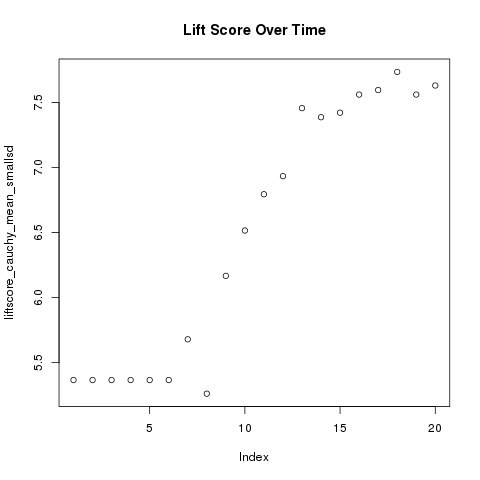

In [40]:
%%R
plot(liftscore_cauchy_mean_smallsd,main='Lift Score Over Time')

In [ ]:
%%R
liftscore_cauchy_mean_scale <- rep(0,20)
#model1 <- vector("list", 20)
predicted_cauchy <- vector("list", 20)
#base2 <- vector("list", 20)
for (i in 1:20){
    model <- bayesglm(formula = label_list[[i]] ~ NUM_ACCOUNTS + NUM_CONTACTS + NUM_OPPTS + NUM_FORECASTS
                   + NUM_REPORTS + NUM_LEADS + NUM_CASES + NUM_SOLUTIONS +NUM_CASE_QUEUES + NUM_CAMPAIGNS
                   + NUM_CUSTOM_APPS + NUM_CUSTOM_TABS + NUM_CUSTOM_OBJECTS + NUM_CUSTOM_OBJECT_RECORDS
                   + NUM_DOCUMENTS + NUM_CONTRACTS +NUM_CASE_RECORD_TYPES + NUM_ESCALATION_RULES
                   + NUM_DASHBOARDS + NUM_EMAIL_TEMPLATES + NUM_VF_PG_TOT, family = "binomial", data = base_s, 
                   maxit=100,prior.mean=1,prior.scale=c(2.5/sd, prior.df=1)
    display(model)
    predicted1 <- predict(model, testing, type="response")
    base2 <- testing
    base2$label <- testing$testlabel
    base2$predict <- predicted1
    print(liftvalue(base2,0.1)) 
    liftscore_cauchy_mean_scale[i] <- liftvalue(base2,0.1)
}

In [ ]:
%%R
liftscore_cauchy_mean_smallsd
"NUM_USERS","NUM_ACCOUNTS","NUM_CONTACTS","NUM_OPPTS","NUM_FORECASTS","NUM_REPORTS","NUM_LEADS",
                       "NUM_CASES","NUM_SOLUTIONS","NUM_CASE_QUEUES","NUM_CAMPAIGNS","NUM_CUSTOM_APPS","NUM_CUSTOM_TABS", 
                       "NUM_CUSTOM_OBJECTS","NUM_CUSTOM_OBJECT_RECORDS","NUM_DOCUMENTS","NUM_CONTRACTS",
                       "NUM_CASE_RECORD_TYPES","NUM_ESCALATION_RULES","NUM_DASHBOARDS","NUM_EMAIL_TEMPLATES","NUM_VF_PG_TOT"

In [ ]:
%%R
plot(liftscore_cauchy_mean_smallsd,main='Lift Score Over Time')

In [23]:
%%R
liftscore_expert <- rep(0,20)
#model1 <- vector("list", 20)
#predicted_expert <- vector("list", 20)
base2 <- testing
base2$label <- testing$testlabel
base2$predict <- base2$NUM_ACCOUNTS + base2$NUM_CONTACTS + base2$NUM_OPPTS + base2$NUM_FORECASTS
                   + base2$NUM_REPORTS + base2$NUM_LEADS + base2$NUM_CASES + base2$NUM_SOLUTIONS 
                   + base2$NUM_CASE_QUEUES + base2$NUM_CAMPAIGNS
                   + base2$NUM_CUSTOM_APPS + base2$NUM_CUSTOM_TABS + base2$NUM_CUSTOM_OBJECTS 
                   + base2$NUM_CUSTOM_OBJECT_RECORDS + base2$NUM_DOCUMENTS + base2$NUM_CONTRACTS 
                   + base2$NUM_CASE_RECORD_TYPES + base2$NUM_ESCALATION_RULES
                   + base2$NUM_DASHBOARDS + base2$NUM_EMAIL_TEMPLATES + base2$NUM_VF_PG_TOT
for (i in 1:20){
    #base2$predict <- base_s$predicted_expert
    #print(liftvalue(base2,0.1)) 
    liftscore_expert[i] <- liftvalue(base2,0.1)   
}

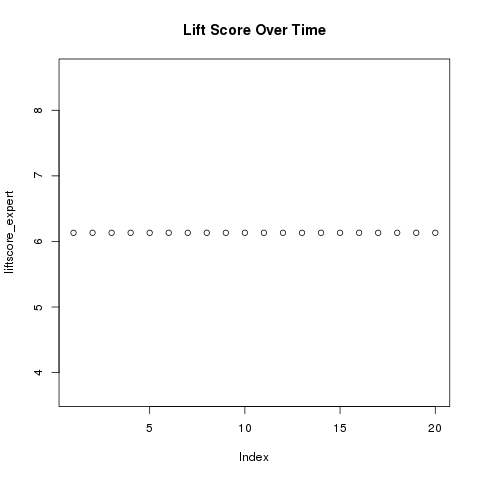

In [42]:
%%R
plot(liftscore_expert,main='Lift Score Over Time')

In [24]:
import pandas as pd
import numpy as np

In [25]:
label_df =pd.read_table("label_df.csv",sep=',')

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
%Rpull base_s

In [31]:
%Rpull testlabel

In [33]:
%Rpull testing

In [34]:
testing_python=testing.drop('testlabel', 1)

In [35]:
testlabel=testing.testlabel

In [46]:
y_test_probability = pd.DataFrame(0,index=np.arange(271614),columns=np.arange(20))

In [47]:
#d = pd.DataFrame(0, index=np.arange(len(testing)), columns=20)
testing_python=testing.drop('testlabel',1)
X_test=testing_python
X_train=base_s
testlabel=testing.testlabel
y_test=testlabel
    
for i in range(20):
    #print i
    i=i+1
    y_train=label_df.ix[:,i] 
    clf = GradientBoostingClassifier().fit(X_train, y_train)
    i=i-1
    y_test_probability.ix[:,i] = clf.predict_proba(X_test)[:,1]

In [48]:
%Rpush y_test_probability

In [49]:
%%R
liftscore_gbm <- rep(0,20)
for (i in 1:20){
    base<- NULL
    base <- testing
    base$label <- testing$testlabel
    base$predict <- y_test_probability[,i]
    liftscore_gbm[i]<-liftvalue(base,0.1)
}

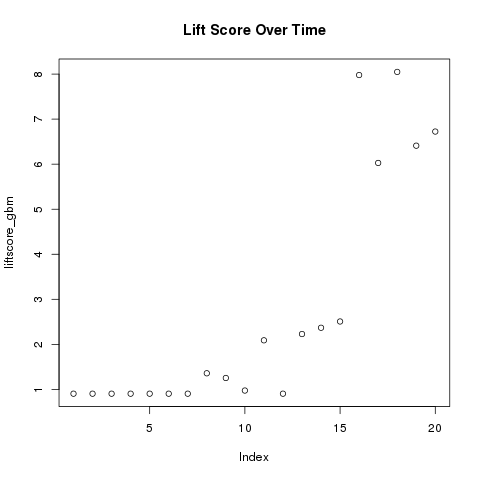

In [51]:
%%R
plot(liftscore_gbm,main='Lift Score Over Time')

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [55]:
logreg = linear_model.LogisticRegression(C=1e5)

In [53]:
y_test_probability = pd.DataFrame(0,index=np.arange(271614),columns=np.arange(20))

In [56]:
testing_python=testing.drop('testlabel',1)
X_test=testing_python
X_train=base_s
testing_python=testing.drop('testlabel', 1)
X_test=testing_python
testlabel=testing.testlabel
y_test=testlabel
    
for i in range(20):
    #print i
    i=i+1
    y_train=label_df.ix[:,i] 
    clf = logreg.fit(X_train, y_train)
    i=i-1
    y_test_probability.ix[:,i] = clf.predict_proba(X_test)[:,1]

In [57]:
%Rpush y_test_probability

In [58]:
%%R
liftscore_lr <- rep(0,20)
for (i in 1:20){
    base<- NULL
    base <- testing
    base$label <- testing$testlabel
    base$predict <- y_test_probability[,i]
    liftscore_lr[i] <- liftvalue(base,0.1)
}

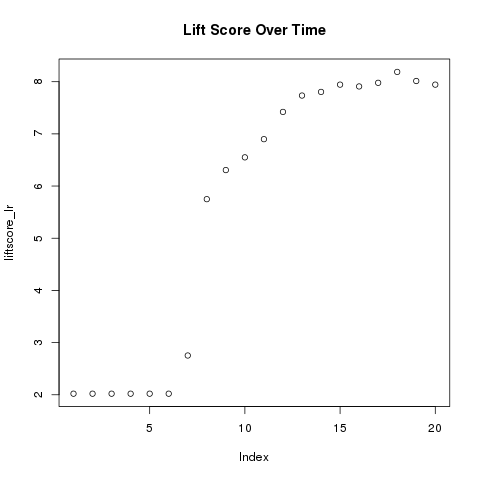

In [60]:
%%R
plot(liftscore_lr,main='Lift Score Over Time')

In [61]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
y_test_probability = pd.DataFrame(0,index=np.arange(271614),columns=np.arange(20))

In [63]:
testing_python=testing.drop('testlabel',1)
X_test=testing_python
X_train=base_s
testlabel=testing.testlabel
y_test=testlabel
    
for i in range(20):
    #print i
    i=i+1
    y_train=label_df.ix[:,i] 
    clf = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=1, random_state=0).fit(X_train, y_train)
    i=i-1
    y_test_probability.ix[:,i] = clf.predict_proba(X_test)[:,1]

In [64]:
%Rpush y_test_probability

In [65]:
%%R
liftscore_rf <- rep(0,20)
for (i in 1:20){
    base<- NULL
    base <- testing
    base$label <- testing$testlabel
    base$predict <- y_test_probability[,i]
    liftscore_rf[i] <- liftvalue(base,0.1)
}

In [66]:
%%R
liftscore_rf

 [1] 1.0452962 1.0452962 1.0452962 1.0452962 1.0452962 1.0452962 0.9756098
 [8] 1.0801394 1.2891986 1.5679443 1.6724739 2.1951220 2.1254355 2.3693380
[15] 2.5087108 2.6132404 2.6480836 2.6480836 3.0313589 3.5191638


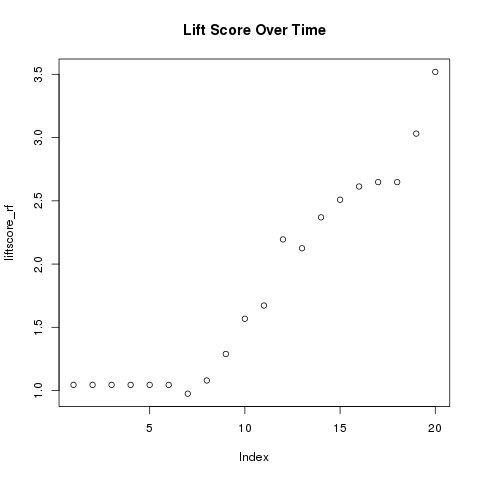

In [71]:
%%R
plot(liftscore_rf,main='Lift Score Over Time')

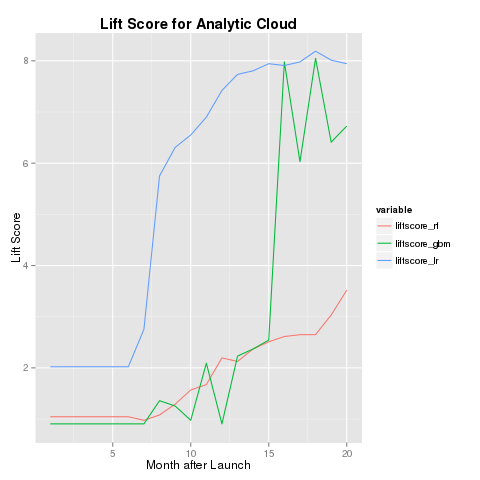

In [72]:
%%R
library(ggplot2)
library(reshape2)
# original data in a 'wide' format
x <- seq(1, 20, 1)
df <- data.frame(x,liftscore_rf,liftscore_gbm,liftscore_lr)
# melt the data to a long format
df2 <- melt(data = df, id.vars = "x")
# plot, using the aesthetics argument 'colour'
ggplot(data = df2, aes(x = x, y = value, colour = variable)) + geom_line()+ 
ggtitle("Lift Score for Analytic Cloud") + theme(plot.title = element_text(lineheight=.8, face="bold"))+ 
xlab("Month after Launch") +ylab("Lift Score") 

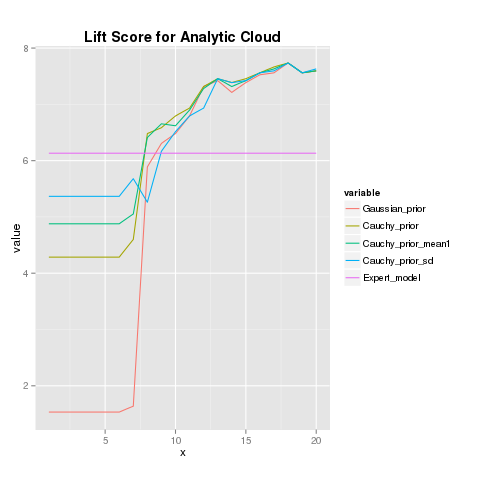

In [65]:
%%R
library(ggplot2)
library(reshape2)
Gaussian_prior <- liftscore
Cauchy_prior <- liftscore_cauchy
Cauchy_prior_mean1 <- liftscore_cauchy_mean
Cauchy_prior_sd <- liftscore_cauchy_mean_smallsd
Expert_model <- liftscore_expert
# original data in a 'wide' format
x <- seq(1, 20, 1)
df1 <- data.frame(x,Gaussian_prior,Cauchy_prior,Cauchy_prior_mean1,Cauchy_prior_sd,Expert_model)
# melt the data to a long format
df2 <- melt(data = df1, id.vars = "x")
# plot, using the aesthetics argument 'colour'
ggplot(data = df2, aes(x = x, y = value, colour = variable),size=4) + geom_line()+ coord_fixed(ratio = 4)+ 
ggtitle("Lift Score for Analytic Cloud") + theme(plot.title = element_text(lineheight=.8, face="bold"))

